<a href="https://colab.research.google.com/github/justcating/pypairs/blob/main/%D0%94%D0%97_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [4]:
df = df[['Size', 'Furnishing Status', 'City', 'Rent']]
df.head()

,Size,Furnishing Status,City,Rent
0,1100.0,Unfurnished,Kolkata,10000.0
1,800.0,Semi-Furnished,Kolkata,20000.0
2,1000.0,Semi-Furnished,Kolkata,17000.0
3,800.0,Unfurnished,Kolkata,10000.0
4,850.0,Unfurnished,Kolkata,7500.0


In [8]:
df.columns = df.columns.str.lower()
df.head()

,size,furnishing status,city,rent
0,1100.0,Unfurnished,Kolkata,10000.0
1,800.0,Semi-Furnished,Kolkata,20000.0
2,1000.0,Semi-Furnished,Kolkata,17000.0
3,800.0,Unfurnished,Kolkata,10000.0
4,850.0,Unfurnished,Kolkata,7500.0


# Завдання 1
Очистіть дані від викидів, розділіть на тренувальну та тестову чатини. Цільова ознака `Rent`

In [9]:
numb_col = df[['size', 'rent']]
numb_col.head()

,size,rent
0,1100.0,10000.0
1,800.0,20000.0
2,1000.0,17000.0
3,800.0,10000.0
4,850.0,7500.0


In [11]:
categ_col = df[['furnishing status', 'city']]
categ_col.head()

,furnishing status,city
0,Unfurnished,Kolkata
1,Semi-Furnished,Kolkata
2,Semi-Furnished,Kolkata
3,Unfurnished,Kolkata
4,Unfurnished,Kolkata


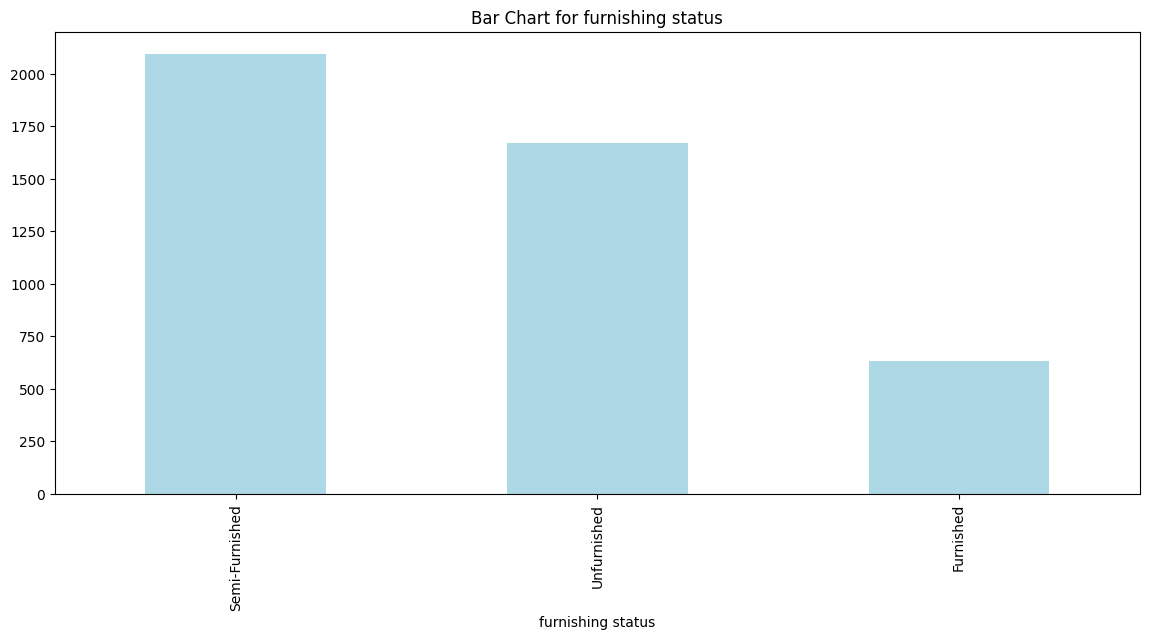

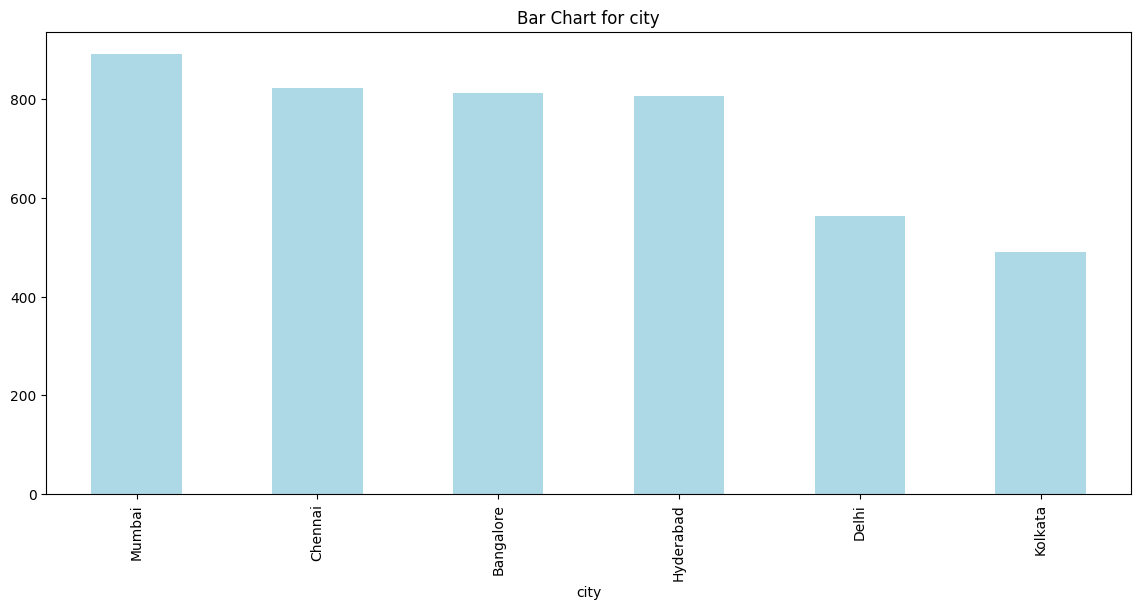

In [15]:
for col in categ_col.columns:
  func_hist = categ_col[col].value_counts().plot(kind='bar', color='lightblue', figsize=(14,6))
  plt.title(f'Bar Chart for {col}')
  plt.show()

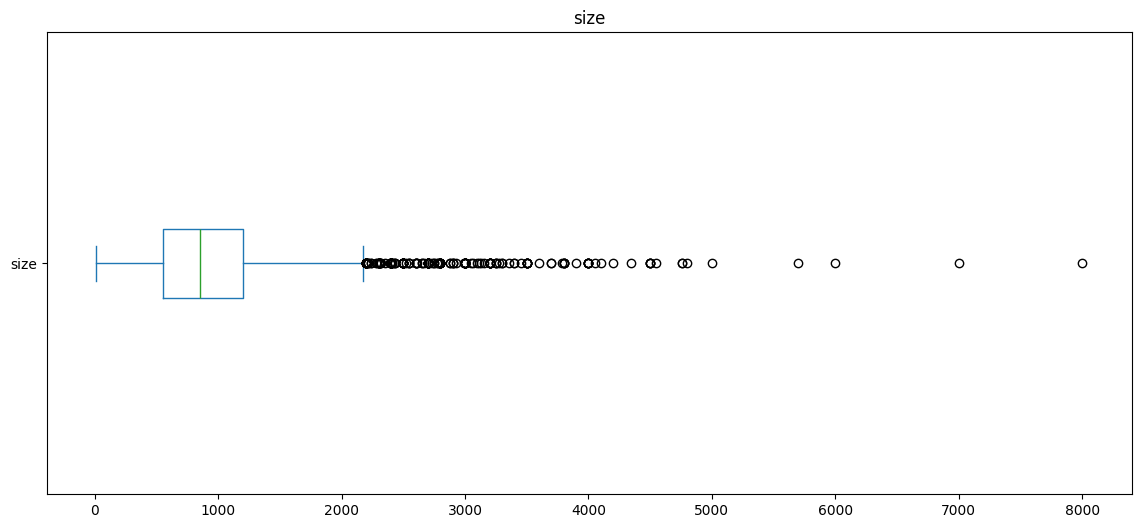

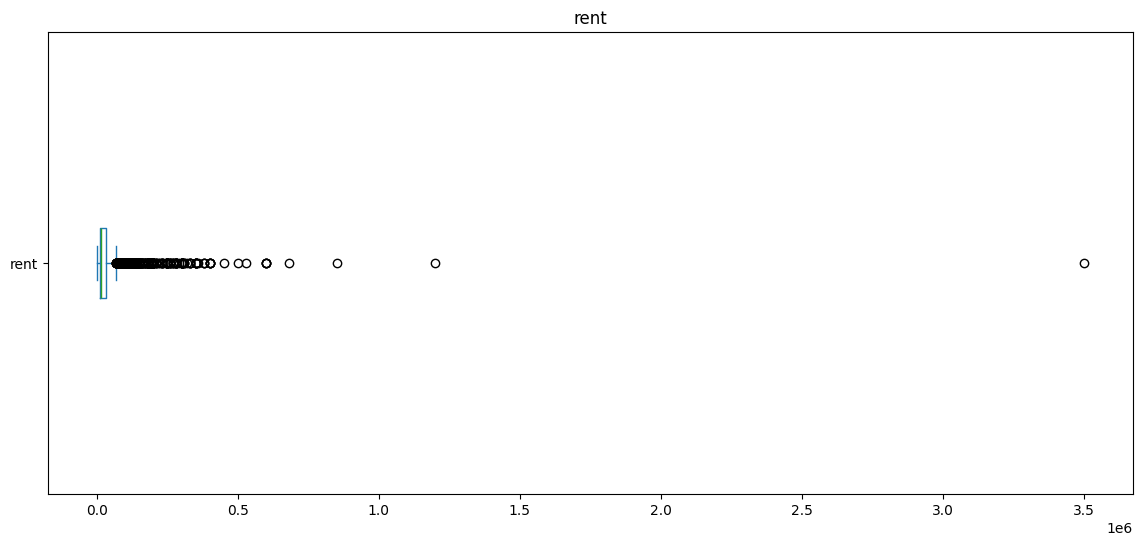

In [17]:
for col in numb_col.columns:
  func_box = numb_col[col].plot(kind='box', vert=False, figsize=(14,6))
  plt.title(f'{col}')
  plt.show()

In [18]:
Q1 = df['rent'].quantile(0.25)
Q3 = df['rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['rent'] >= lower_bound) & (df['rent'] <= upper_bound)]
df_clean

,size,furnishing status,city,rent
0,1100.0,Unfurnished,Kolkata,10000.0
1,800.0,Semi-Furnished,Kolkata,20000.0
2,1000.0,Semi-Furnished,Kolkata,17000.0
3,800.0,Unfurnished,Kolkata,10000.0
4,850.0,Unfurnished,Kolkata,7500.0
...,...,...,...,...
4741,1000.0,Semi-Furnished,Hyderabad,15000.0
4742,2000.0,Semi-Furnished,Hyderabad,29000.0
4743,1750.0,Semi-Furnished,Hyderabad,35000.0
4744,1500.0,Semi-Furnished,Hyderabad,45000.0


In [19]:
numb_col_clean = df_clean[['size','rent']]
numb_col_clean.head()

,size,rent
0,1100.0,10000.0
1,800.0,20000.0
2,1000.0,17000.0
3,800.0,10000.0
4,850.0,7500.0


In [20]:
categ_col_clean = df_clean[['furnishing status','city']]
categ_col_clean.head()

,furnishing status,city
0,Unfurnished,Kolkata
1,Semi-Furnished,Kolkata
2,Semi-Furnished,Kolkata
3,Unfurnished,Kolkata
4,Unfurnished,Kolkata


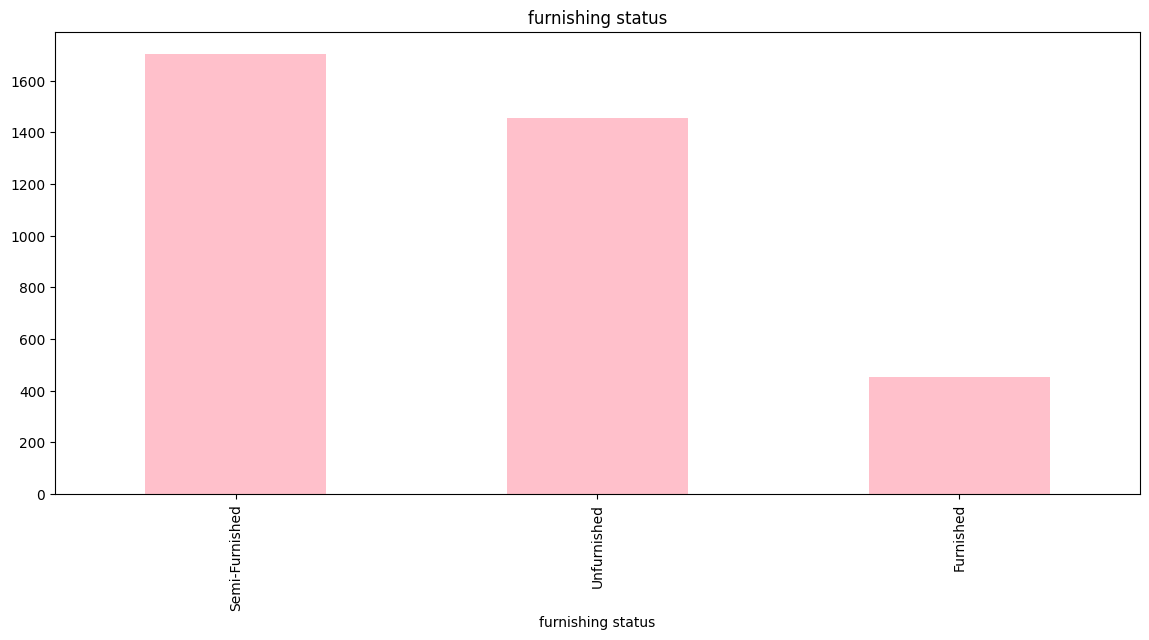

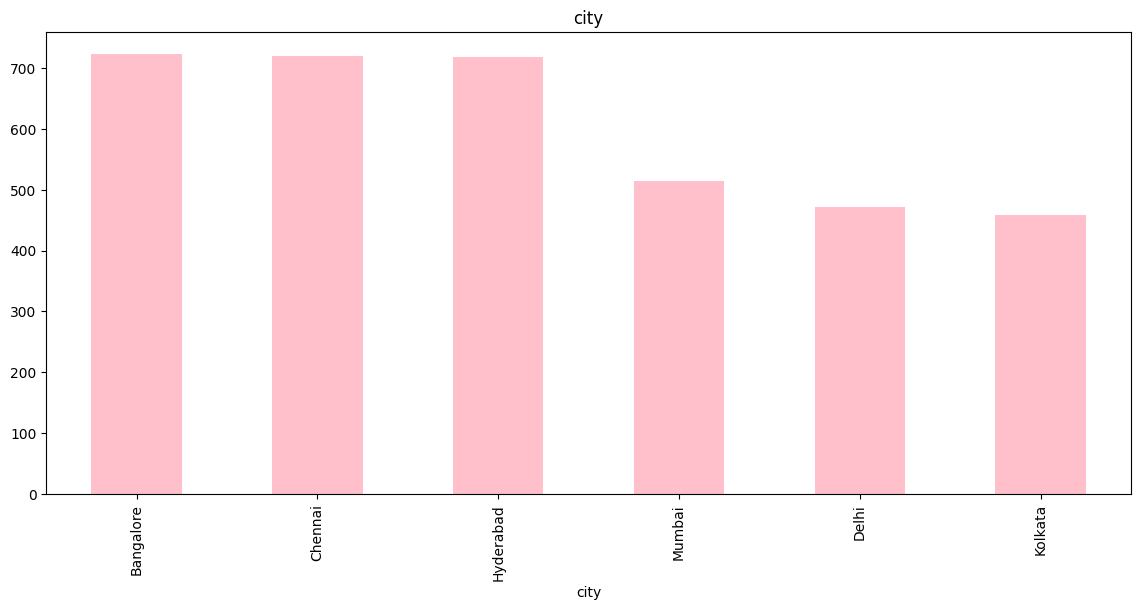

In [21]:
for col in categ_col_clean.columns:
  func_hist = categ_col_clean[col].value_counts().plot(kind='bar', color='pink', figsize=(14,6))
  plt.title(f'{col}')
  plt.show()

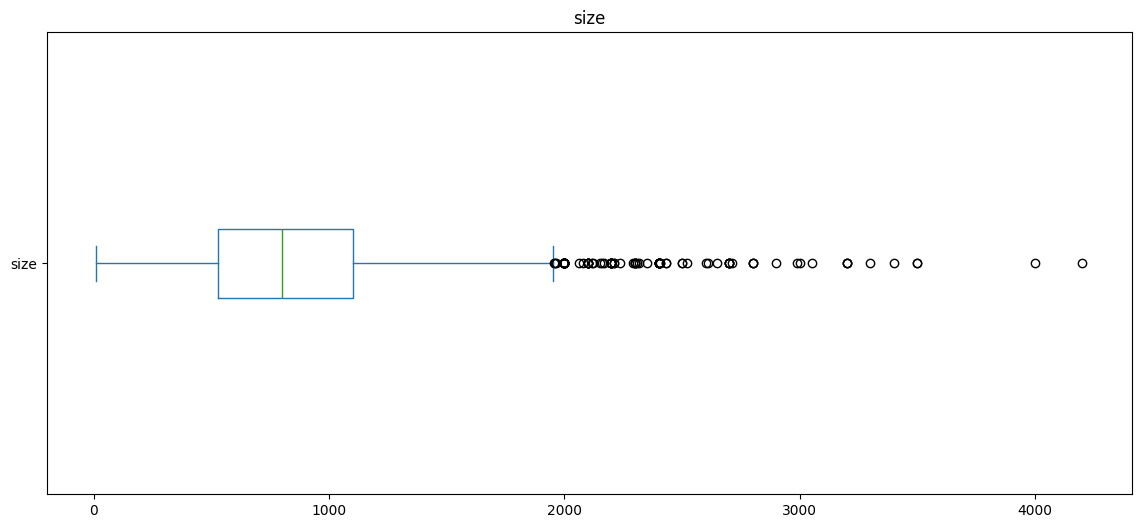

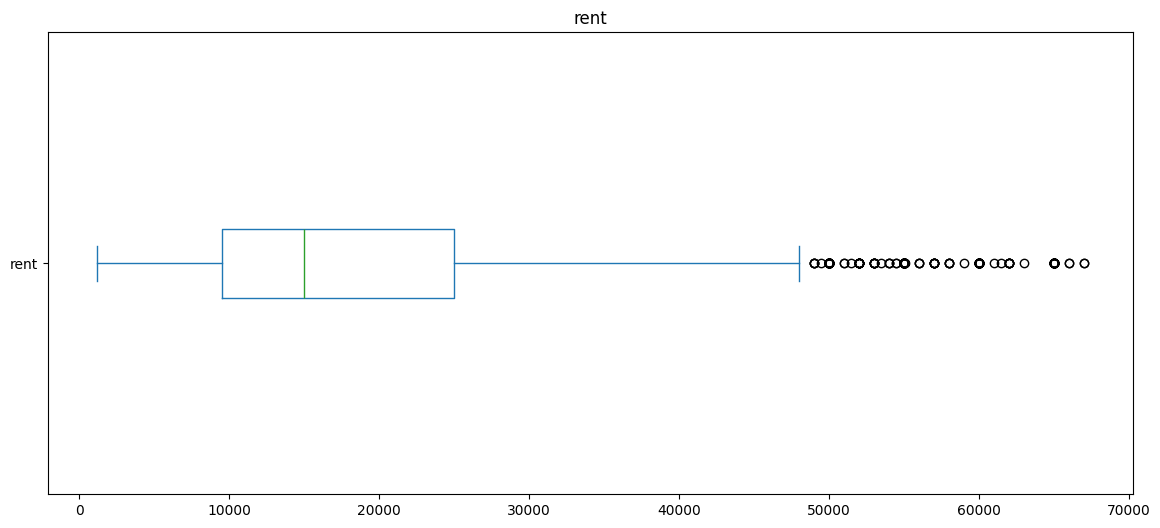

In [22]:
for col in numb_col_clean.columns:
  func_box = numb_col_clean[col].plot(kind='box', vert=False, figsize=(14,6))
  plt.title(f'{col}')
  plt.show()

# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [23]:
numb_col_clean.isna().sum()

,0
size,285
rent,0


In [25]:
y = df_clean['rent']
X = df_clean[['furnishing status', 'city']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=.8,
                                                    random_state=42)

In [27]:
num_columns = X_train.select_dtypes(include='number').columns

In [28]:
num_transformer = Pipeline([('impute', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [29]:
categ_col_clean.isna().sum()

,0
furnishing status,283
city,289


In [30]:
cat_columns = X_train.select_dtypes(include='object').columns

cat_transformer = Pipeline([('impute', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [31]:
preprocessor = ColumnTransformer([('num', num_transformer, num_columns), ('cat', cat_transformer, cat_columns)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index([], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['furnishing status', 'city'], dtype='object'))])

# Завдання 5
Створіть остаточну модель та натренуйте її

In [33]:
full_model = Pipeline([('prep', preprocessor),
                       ('lin reg', LinearRegression())])

full_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['furnishing status', 'city'], dtype='object'))])),
                ('lin reg', LinearRegression())])

# Завдання 6
Виведіть основні метрики моделі

In [34]:
y_pred = full_model.predict(X_test)

In [35]:
mean_absolute_error(y_test, y_pred)

8750.988305672081

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

12069.461866663076

In [37]:
r2_score(y_test, y_pred)

0.30921028951385976

# Завдання 7
Спрогнозуйте ціну будинку

In [38]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Mumbai']})

data

,Size,Furnishing Status,City
0,900,Semi-Furnished,Mumbai


In [39]:
data.columns = data.columns.str.lower()

In [40]:
predicted_rent = full_model.predict(data)
predicted_rent

array([37529.54964727])